# Emsebling Image and Caption mdoel resutls during prediction time

In [16]:
import numpy as np
import ast
from sklearn.metrics import f1_score
import hecutils.plotting_utils as pt
import hecutils.image_utils as imut

None


Using TensorFlow backend.


## Caption prediction results

In [18]:
# From Captions Predictions

caption_class_to_index = {0: 0, 1: 1, -1: 2}

# From Image captions
# 0 index: neutral
# 1 index: positive
# 2 index negative

imgToPredictionFromCaptions= {'Alcohol 7.jpg': np.array([0.97, 0.01, 0.02], dtype=float), 'Bungee jumping 3.jpg': np.array([0.19, 0.81, 0.  ], dtype=float), 'Camping 3.jpg': np.array([0.55, 0.45, 0.  ], dtype=float), 'Camping 8.jpg': np.array([0.12, 0.88, 0.  ], dtype=float), 'Camping 9.jpg': np.array([0.98, 0.01, 0.02], dtype=float), 'Car accident 1.jpg': np.array([0.4 , 0.01, 0.58], dtype=float), 'Child labor 1.jpg': np.array([0.29, 0.66, 0.05], dtype=float), 'Coffee 1.jpg': np.array([0.04, 0.96, 0.  ], dtype=float), 'Cold 7.jpg': np.array([0.89, 0.02, 0.09], dtype=float), 'Couple 4.jpg': np.array([6.59e-02, 9.33e-01, 9.31e-04], dtype=float), 'Couple 8.jpg': np.array([0.13, 0.86, 0.01], dtype=float), 'Crosswalk 1.jpg': np.array([0.45, 0.19, 0.36], dtype=float), 'Cups 1.jpg': np.array([0.57, 0.39, 0.03], dtype=float), 'Cups 4.jpg': np.array([0.88, 0.09, 0.03], dtype=float), 'Dancing 7.jpg': np.array([0.52, 0.48, 0.01], dtype=float), 'Dead bodies 3.jpg': np.array([0.16, 0.04, 0.8 ], dtype=float), 'Depressed pose 3.jpg': np.array([0.47, 0.49, 0.03], dtype=float), 'Dessert 3.jpg': np.array([1.17e-02, 9.88e-01, 4.38e-04], dtype=float), 'Doctor 3.jpg': np.array([0.95, 0.04, 0.01], dtype=float), 'Dog 3.jpg': np.array([0.25, 0.67, 0.08], dtype=float), 'Dog 6.jpg': np.array([0.04, 0.96, 0.  ], dtype=float), 'Dog 11.jpg': np.array([0.24, 0.75, 0.  ], dtype=float), 'Dog 19.jpg': np.array([0.32, 0.3 , 0.38], dtype=float), 'Dog 20.jpg': np.array([0.49, 0.29, 0.23], dtype=float), 'Dog 31.jpg': np.array([0.56, 0.28, 0.16], dtype=float), 'Fire hydrant 1.jpg': np.array([0.74, 0.08, 0.18], dtype=float), 'Flowers 7.jpg': np.array([2.14e-02, 9.78e-01, 8.44e-04], dtype=float), 'Flowers 10.jpg': np.array([0.14, 0.85, 0.  ], dtype=float), 'Food 1.jpg': np.array([0.24, 0.29, 0.47], dtype=float), 'Food 5.jpg': np.array([0.55, 0.13, 0.32], dtype=float), 'Frustrated pose 1.jpg': np.array([0.29, 0.44, 0.28], dtype=float), 'Frustrated pose 2.jpg': np.array([0.44, 0.21, 0.35], dtype=float), 'Funeral 1.jpg': np.array([0.6 , 0.13, 0.27], dtype=float), 'Gazing 6.jpg': np.array([0.17, 0.83, 0.  ], dtype=float), 'Graveyard 1.jpg': np.array([0.2 , 0.76, 0.05], dtype=float), 'Gun 9.jpg': np.array([0.15, 0.  , 0.84], dtype=float), 'Hangover 1.jpg': np.array([0.75, 0.  , 0.24], dtype=float), 'House 1.jpg': np.array([0.98, 0.01, 0.01], dtype=float), 'KKK rally 2.jpg': np.array([0.16, 0.01, 0.83], dtype=float), 'Lightning 2.jpg': np.array([0.99, 0.  , 0.01], dtype=float), 'Meerkat 1.jpg': np.array([0.1 , 0.02, 0.88], dtype=float), 'Memorial 3.jpg': np.array([0.65, 0.02, 0.33], dtype=float), 'Miserable pose 5.jpg': np.array([0.25, 0.13, 0.62], dtype=float), 'Monkey 1.jpg': np.array([0.45, 0.15, 0.4 ], dtype=float), 'Mother 3.jpg': np.array([0.38, 0.47, 0.15], dtype=float), 'Mother 6.jpg': np.array([1.37e-02, 9.85e-01, 8.76e-04], dtype=float), 'Nude couple 12.jpg': np.array([0.09, 0.9 , 0.  ], dtype=float), 'Nude man 8.jpg': np.array([0.72, 0.28, 0.01], dtype=float), 'Nude woman 5.jpg': np.array([0.25, 0.75, 0.01], dtype=float), 'Nude woman 14.jpg': np.array([0.23, 0.7 , 0.07], dtype=float), 'BDSM 3.jpg': np.array([0.17, 0.83, 0.  ], dtype=float), 'Nude woman 19.jpg': np.array([0.94, 0.01, 0.04], dtype=float), 'Paperclips 3.jpg': np.array([0.77, 0.06, 0.17], dtype=float), 'Paperclips 4.jpg': np.array([0.56, 0.17, 0.26], dtype=float), 'Penguins 2.jpg': np.array([0.04, 0.96, 0.  ], dtype=float), 'Picnic 1.jpg': np.array([0.04, 0.95, 0.01], dtype=float), 'Pigeon 2.jpg': np.array([0.17, 0.04, 0.8 ], dtype=float), 'Police 3.jpg': np.array([0.92, 0.08, 0.  ], dtype=float), 'Present 1.jpg': np.array([1.05e-02, 9.89e-01, 3.06e-04], dtype=float), 'Rafting 2.jpg': np.array([0.73, 0.25, 0.02], dtype=float), 'Rafting 6.jpg': np.array([0.54, 0.45, 0.  ], dtype=float), 'Rocks 4.jpg': np.array([0.89, 0.05, 0.05], dtype=float), 'Rocks 5.jpg': np.array([0.92, 0.07, 0.01], dtype=float), 'Roofing 1.jpg': np.array([0.88, 0.02, 0.1 ], dtype=float), 'Sad pose 3.jpg': np.array([0.54, 0.19, 0.27], dtype=float), 'Sad pose 5.jpg': np.array([0.67, 0.04, 0.29], dtype=float), 'Scared cat 1.jpg': np.array([0.3 , 0.7 , 0.01], dtype=float), 'School 5.jpg': np.array([0.84, 0.09, 0.07], dtype=float), 'Shark 10.jpg': np.array([0.82, 0.06, 0.12], dtype=float), 'Shot 4.jpg': np.array([0.25, 0.  , 0.74], dtype=float), 'Shot 5.jpg': np.array([0.75, 0.02, 0.22], dtype=float), 'Sidewalk 6.jpg': np.array([0.42, 0.47, 0.11], dtype=float), 'Bird 2.jpg': np.array([0.35, 0.37, 0.28], dtype=float), 'Bird 3.jpg': np.array([0.1 , 0.89, 0.  ], dtype=float), 'Smiling face 1.jpg': np.array([0.2, 0.8, 0. ], dtype=float), 'Bird 5.jpg': np.array([0.44, 0.2 , 0.35], dtype=float), 'Soldiers 2.jpg': np.array([0.94, 0.01, 0.05], dtype=float), 'Soldiers 7.jpg': np.array([0.84, 0.03, 0.13], dtype=float), 'Statue 1.jpg': np.array([2.70e-02, 9.72e-01, 6.49e-04], dtype=float), 'Stingray 1.jpg': np.array([0.11, 0.88, 0.01], dtype=float), 'Storage 2.jpg': np.array([0.88, 0.04, 0.08], dtype=float), 'Surgery 4.jpg': np.array([0.81, 0.02, 0.17], dtype=float), 'Swimming 1.jpg': np.array([0.51, 0.48, 0.01], dtype=float), 'Thunderstorm 5.jpg': np.array([0.86, 0.14, 0.  ], dtype=float), 'Tornado 3.jpg': np.array([0.15, 0.02, 0.84], dtype=float), 'War 3.jpg': np.array([0.72, 0.04, 0.24], dtype=float), 'Wedding 4.jpg': np.array([0.09, 0.91, 0.  ], dtype=float), 'Wedding 5.jpg': np.array([3.22e-02, 9.67e-01, 5.15e-04], dtype=float), 'Wedding 12.jpg': np.array([0.91, 0.08, 0.  ], dtype=float), 'Bricks 1.jpg': np.array([0.87, 0.04, 0.08], dtype=float)}
imgToPredictionFromCaptions

{'Alcohol 7.jpg': array([0.97, 0.01, 0.02]), 'Bungee jumping 3.jpg': array([0.19, 0.81, 0.  ]), 'Camping 3.jpg': array([0.55, 0.45, 0.  ]), 'Camping 8.jpg': array([0.12, 0.88, 0.  ]), 'Camping 9.jpg': array([0.98, 0.01, 0.02]), 'Car accident 1.jpg': array([0.4 , 0.01, 0.58]), 'Child labor 1.jpg': array([0.29, 0.66, 0.05]), 'Coffee 1.jpg': array([0.04, 0.96, 0.  ]), 'Cold 7.jpg': array([0.89, 0.02, 0.09]), 'Couple 4.jpg': array([6.59e-02, 9.33e-01, 9.31e-04]), 'Couple 8.jpg': array([0.13, 0.86, 0.01]), 'Crosswalk 1.jpg': array([0.45, 0.19, 0.36]), 'Cups 1.jpg': array([0.57, 0.39, 0.03]), 'Cups 4.jpg': array([0.88, 0.09, 0.03]), 'Dancing 7.jpg': array([0.52, 0.48, 0.01]), 'Dead bodies 3.jpg': array([0.16, 0.04, 0.8 ]), 'Depressed pose 3.jpg': array([0.47, 0.49, 0.03]), 'Dessert 3.jpg': array([1.17e-02, 9.88e-01, 4.38e-04]), 'Doctor 3.jpg': array([0.95, 0.04, 0.01]), 'Dog 3.jpg': array([0.25, 0.67, 0.08]), 'Dog 6.jpg': array([0.04, 0.96, 0.  ]), 'Dog 11.jpg': array([0.24, 0.75, 0.  ]), 'D

## Image prediction results

In [29]:
#Image Predictions:

caption_class_to_index = {-1: 2, 0: 0, 1: 1} # {neg: 2, neut: 0, pos: 1}
# From Image captions
# 0 index: neutral
# 1 index: positive
# 2 index negative


image_class_to_index =   {-1: 0, 0: 1, 1: 2} # {neg: 0, neut: 1, pos: 2}
# For Image pixels:
# 0 index : negative
# 1 index :neutral
# 2 index : positive

# For Aligning Image indices to match caption indices
# 1) put image_pred[1]
# 2) put image_pred[2]
# 3) put image_pred[0]

#Final class to index
class_to_index = {-1: 2, 0: 0, 1: 1} # {neg: 2, neut: 0, pos: 1}


imgToPredictionFromImages =  {'Car accident 1.jpg': np.array([0.67, 0.19, 0.14], dtype=float), 'Dead bodies 3.jpg': np.array([0.97, 0.02, 0.  ], dtype=float), 'Depressed pose 3.jpg': np.array([0.34, 0.36, 0.3 ], dtype=float), 'Dog 31.jpg': np.array([0.14, 0.52, 0.34], dtype=float), 'Frustrated pose 1.jpg': np.array([0.69, 0.28, 0.03], dtype=float), 'Frustrated pose 2.jpg': np.array([0.87, 0.09, 0.04], dtype=float), 'Funeral 1.jpg': np.array([0.69, 0.2 , 0.1 ], dtype=float), 'Gun 9.jpg': np.array([0.92, 0.07, 0.  ], dtype=float), 'Hangover 1.jpg': np.array([0.02, 0.11, 0.88], dtype=float), 'KKK rally 2.jpg': np.array([0.59, 0.4 , 0.01], dtype=float), 'Miserable pose 5.jpg': np.array([0.07, 0.4 , 0.54], dtype=float), 'Sad pose 3.jpg': np.array([0.35, 0.34, 0.32], dtype=float), 'Shot 4.jpg': np.array([0.23, 0.6 , 0.17], dtype=float), 'Sidewalk 6.jpg': np.array([2.25e-02, 9.77e-01, 1.38e-06], dtype=float), 'Soldiers 7.jpg': np.array([0.47, 0.49, 0.05], dtype=float), 'Tornado 3.jpg': np.array([0.22, 0.74, 0.03], dtype=float), 'Alcohol 7.jpg': np.array([0.15, 0.71, 0.14], dtype=float), 'BDSM 3.jpg': np.array([0.05, 0.47, 0.48], dtype=float), 'Bird 5.jpg': np.array([0.57, 0.18, 0.25], dtype=float), 'Bricks 1.jpg': np.array([5.49e-03, 9.94e-01, 2.27e-05], dtype=float), 'Camping 8.jpg': np.array([0.42, 0.45, 0.13], dtype=float), 'Camping 9.jpg': np.array([0.36, 0.38, 0.26], dtype=float), 'Child labor 1.jpg': np.array([0.32, 0.65, 0.02], dtype=float), 'Crosswalk 1.jpg': np.array([0.38, 0.53, 0.09], dtype=float), 'Cups 1.jpg': np.array([0.05, 0.37, 0.57], dtype=float), 'Cups 4.jpg': np.array([0.4 , 0.52, 0.09], dtype=float), 'Doctor 3.jpg': np.array([0.18, 0.24, 0.58], dtype=float), 'Fire hydrant 1.jpg': np.array([0.17, 0.63, 0.2 ], dtype=float), 'Food 1.jpg': np.array([0.13, 0.19, 0.67], dtype=float), 'Graveyard 1.jpg': np.array([0.29, 0.51, 0.19], dtype=float), 'House 1.jpg': np.array([0.56, 0.4 , 0.04], dtype=float), 'Lightning 2.jpg': np.array([1.86e-05, 1.00e+00, 3.44e-04], dtype=float), 'Meerkat 1.jpg': np.array([0.23, 0.33, 0.43], dtype=float), 'Memorial 3.jpg': np.array([0.84, 0.11, 0.05], dtype=float), 'Monkey 1.jpg': np.array([0.16, 0.64, 0.19], dtype=float), 'Nude man 8.jpg': np.array([0.  , 0.96, 0.04], dtype=float), 'Nude woman 19.jpg': np.array([0.11, 0.48, 0.41], dtype=float), 'Paperclips 3.jpg': np.array([0.12, 0.87, 0.01], dtype=float), 'Paperclips 4.jpg': np.array([0.06, 0.84, 0.1 ], dtype=float), 'Pigeon 2.jpg': np.array([0.35, 0.39, 0.26], dtype=float), 'Police 3.jpg': np.array([0.75, 0.19, 0.06], dtype=float), 'Rafting 2.jpg': np.array([0.  , 0.15, 0.85], dtype=float), 'Rafting 6.jpg': np.array([0.02, 0.26, 0.71], dtype=float), 'Rocks 4.jpg': np.array([3.20e-02, 9.68e-01, 4.03e-04], dtype=float), 'Rocks 5.jpg': np.array([0.02, 0.98, 0.  ], dtype=float), 'Roofing 1.jpg': np.array([2.92e-02, 9.70e-01, 3.33e-04], dtype=float), 'Sad pose 5.jpg': np.array([0.05, 0.53, 0.41], dtype=float), 'Scared cat 1.jpg': np.array([0.21, 0.35, 0.43], dtype=float), 'School 5.jpg': np.array([0.15, 0.37, 0.47], dtype=float), 'Shark 10.jpg': np.array([5.83e-04, 9.99e-01, 7.14e-04], dtype=float), 'Shot 5.jpg': np.array([0.23, 0.53, 0.24], dtype=float), 'Soldiers 2.jpg': np.array([0.18, 0.4 , 0.42], dtype=float), 'Stingray 1.jpg': np.array([0.33, 0.27, 0.4 ], dtype=float), 'Storage 2.jpg': np.array([0.04, 0.81, 0.14], dtype=float), 'Surgery 4.jpg': np.array([0.12, 0.45, 0.43], dtype=float), 'Thunderstorm 5.jpg': np.array([5.39e-05, 9.96e-01, 3.73e-03], dtype=float), 'War 3.jpg': np.array([0.52, 0.43, 0.05], dtype=float), 'Wedding 12.jpg': np.array([0.02, 0.29, 0.69], dtype=float), 'Bird 2.jpg': np.array([0.22, 0.26, 0.52], dtype=float), 'Bird 3.jpg': np.array([0.08, 0.21, 0.7 ], dtype=float), 'Bungee jumping 3.jpg': np.array([0.08, 0.4 , 0.52], dtype=float), 'Camping 3.jpg': np.array([0.09, 0.36, 0.55], dtype=float), 'Coffee 1.jpg': np.array([0.04, 0.15, 0.82], dtype=float), 'Cold 7.jpg': np.array([0.11, 0.81, 0.08], dtype=float), 'Couple 4.jpg': np.array([0.01, 0.12, 0.87], dtype=float), 'Couple 8.jpg': np.array([0.2 , 0.38, 0.42], dtype=float), 'Dancing 7.jpg': np.array([0. , 0.1, 0.9], dtype=float), 'Dessert 3.jpg': np.array([0.09, 0.21, 0.7 ], dtype=float), 'Dog 11.jpg': np.array([0.16, 0.23, 0.61], dtype=float), 'Dog 19.jpg': np.array([0.03, 0.17, 0.8 ], dtype=float), 'Dog 20.jpg': np.array([0.25, 0.23, 0.52], dtype=float), 'Dog 3.jpg': np.array([0.14, 0.23, 0.63], dtype=float), 'Dog 6.jpg': np.array([0.13, 0.3 , 0.56], dtype=float), 'Flowers 10.jpg': np.array([0.05, 0.09, 0.86], dtype=float), 'Flowers 7.jpg': np.array([1.34e-04, 4.05e-03, 9.96e-01], dtype=float), 'Food 5.jpg': np.array([0.1 , 0.09, 0.81], dtype=float), 'Gazing 6.jpg': np.array([0.34, 0.4 , 0.26], dtype=float), 'Mother 3.jpg': np.array([0.15, 0.3 , 0.55], dtype=float), 'Mother 6.jpg': np.array([0.01, 0.01, 0.98], dtype=float), 'Nude couple 12.jpg': np.array([0.05, 0.43, 0.52], dtype=float), 'Nude woman 14.jpg': np.array([0.02, 0.16, 0.82], dtype=float), 'Nude woman 5.jpg': np.array([0.1 , 0.39, 0.5 ], dtype=float), 'Penguins 2.jpg': np.array([0.29, 0.31, 0.4 ], dtype=float), 'Picnic 1.jpg': np.array([0.23, 0.29, 0.48], dtype=float), 'Present 1.jpg': np.array([0.01, 0.06, 0.93], dtype=float), 'Smiling face 1.jpg': np.array([0.24, 0.38, 0.38], dtype=float), 'Statue 1.jpg': np.array([0.41, 0.3 , 0.29], dtype=float), 'Swimming 1.jpg': np.array([0.01, 0.2 , 0.79], dtype=float), 'Wedding 4.jpg': np.array([6.59e-06, 7.19e-04, 9.99e-01], dtype=float), 'Wedding 5.jpg': np.array([0.07, 0.12, 0.81], dtype=float)}
#imgToPredictionFromImages = collections.OrderedDict(sorted(imgToPredictionFromImages.items()))
#imgToPredictionFromImages

imgToPredictionFromImagesAligned = {}
for image_name, prediction in imgToPredictionFromImages.items():
    predAligned = []
    predAligned.append(prediction[1])
    predAligned.append(prediction[2])
    predAligned.append(prediction[0])
    imgToPredictionFromImagesAligned[image_name] = predAligned
    
imgToPredictionFromImagesAligned    

{'Car accident 1.jpg': [0.19, 0.14, 0.67],
 'Dead bodies 3.jpg': [0.02, 0.0, 0.97],
 'Depressed pose 3.jpg': [0.36, 0.3, 0.34],
 'Dog 31.jpg': [0.52, 0.34, 0.14],
 'Frustrated pose 1.jpg': [0.28, 0.03, 0.69],
 'Frustrated pose 2.jpg': [0.09, 0.04, 0.87],
 'Funeral 1.jpg': [0.2, 0.1, 0.69],
 'Gun 9.jpg': [0.07, 0.0, 0.92],
 'Hangover 1.jpg': [0.11, 0.88, 0.02],
 'KKK rally 2.jpg': [0.4, 0.01, 0.59],
 'Miserable pose 5.jpg': [0.4, 0.54, 0.07],
 'Sad pose 3.jpg': [0.34, 0.32, 0.35],
 'Shot 4.jpg': [0.6, 0.17, 0.23],
 'Sidewalk 6.jpg': [0.977, 1.38e-06, 0.0225],
 'Soldiers 7.jpg': [0.49, 0.05, 0.47],
 'Tornado 3.jpg': [0.74, 0.03, 0.22],
 'Alcohol 7.jpg': [0.71, 0.14, 0.15],
 'BDSM 3.jpg': [0.47, 0.48, 0.05],
 'Bird 5.jpg': [0.18, 0.25, 0.57],
 'Bricks 1.jpg': [0.994, 2.27e-05, 0.00549],
 'Camping 8.jpg': [0.45, 0.13, 0.42],
 'Camping 9.jpg': [0.38, 0.26, 0.36],
 'Child labor 1.jpg': [0.65, 0.02, 0.32],
 'Crosswalk 1.jpg': [0.53, 0.09, 0.38],
 'Cups 1.jpg': [0.37, 0.57, 0.05],
 'Cups 4.jpg

## Calculate Predictions by averaging image and caption predictions

y_true
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
y_pred
 [-1, -1, 0, 0, -1, -1, -1, -1, 1, -1, -1, 0, -1, 0, 0, -1, 0, 1, -1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, -1, -1, 0, 0, 0, 0, 0, -1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Accuracy: 77.77777777777777
f1:  0.7720123610534569


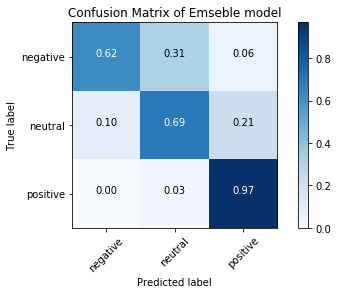

In [31]:
y_true =  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

y_pred = []
for img_name in imgToPredictionFromImagesAligned:
    caption_pred = imgToPredictionFromCaptions[img_name]
    img_pred = imgToPredictionFromImagesAligned[img_name]
    pred = (caption_pred + img_pred) / 2.0
    y_pred.append(pred)
    
y_pred = imut.conver_predictions_to_classes(y_pred, caption_class_to_index)    
print("y_true\n",y_true)
print("y_pred\n",y_pred)

correctCount = 0
wrongCount = 0
for predLabel,trueLabel in zip(y_pred, y_true):
    if predLabel == trueLabel:
        correctCount += 1
    else:
        wrongCount += 1
accuracy = correctCount * 100.0 / (correctCount + wrongCount)        
print("Accuracy:", accuracy )
f1 = f1_score(y_true, y_pred, average='weighted')
print("f1: ", f1)
titleOfConfusionMatrix = "Confusion Matrix of Emseble model"
pt.plot_confusion_matrix_from_labels(y_true, y_pred, titleOfConfusionMatrix)